   # <font color='steelblue' size=6px> BFS, DFS i njihova primjena za rješavanje labirinta </font>

<br>

**Kratki uvod:** Ideja ovog eseja je proučiti BFS i DFS algoritme pretraživanja prostora stanja. Pogledat ćemo  njihovu implementaciju, primjer izvođenja na grafu te konkretnu primjenu na problemu rješavanja labirinta. 
<br>

**Sadržaj:**
* 1.[Uvod - Općenito o grafovima](#uvod)
* 2.[Pretraživanje prostora stanja](#pps)
    * 2.1 [BFS](#bfs)
    * 2.2 [DFS](#dfs)
* 3.[Primjena BFS i DFS](#labirint)
* 4.[Zaključak](#zakljucak)
* 5.[Literatura](#lit)


## <font color='steelblue' size=5px> 1. Uvod - Općenito o grafovima <a name="uvod"></a> </font>


**Def:** <i>**Jednostavan graf G** sastoji se od nepraznog konačnog skupa skupa V čije
elemente zovemo **vrhovi** i konačnog skupa E različitih parova elemenata V koje
zovemo **bridovi**.</i>

Smatramo da je graf zadan ako su zadani njegovi skupovi vrhova i bridova. Označavamo ga s **G(V,E)**.

**Oznake:**
* U teoremima i definicijama vrhove obično označavamo malim slovima  *u,v*, a bridove slovima *e,f*. 
* Brid između vrhova *u* i *v* označavamo sa *e={u,v}* ili *e=uv*. 
* U grafovima vrhove označavamo velikim tiskanim slovima A,B,C, ...
<br><br>

**Def:** <i>Za vrhove u i v kažemo da su ***susjedni*** ako postoji brid *e=uv* u tom grafu koji
ih spaja. Za bridove e i f kažemo da su susjedni ako postoji vrh u u tom grafu koji je njima
zajednički.</i> 
<br><br>


In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from collections import deque

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
plt.rcParams['figure.max_open_warning'] = 200

import copy

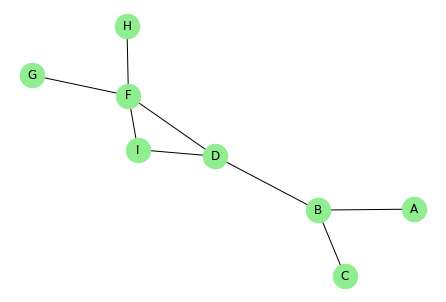

In [2]:
df = pd.DataFrame({'source': ['A', 'B','B','D','F','F','D','I'],
                   'target': ['B','C','D','F','G','H','I','F']})
g1 = nx.Graph()
g1 = nx.from_pandas_edgelist(df)
nx.draw(g1, with_labels=True, node_color="lightgreen", node_shape='o', node_size=600)
plt.show()

        Primjer 1.1: Povezani graf

**Def:** <i>**Put u grafu G** je konačan slijed bridova v1v2,v2v3,…,vn-1vn u kojem su svaka
dva brida susjedna i svi su vrhovi različiti, osim eventualno početni i krajnji. Put možemo
označavati i kao v1 → v2 → v3 → ... → vn.</i>

**Def:** <i>Za graf G kažemo da je **povezan** ako i samo ako postoji put između
svaka dva vrha.</i>
<br><br>

Na primjeru 1.1. vidimo povezani grafa, a u donjem primjeru ćemo vidjeti nepovezanog.

In [3]:
g1.remove_node('D')
g1.nodes() #ispisuje nam sve vrhove u grafu 

NodeView(('A', 'B', 'C', 'F', 'G', 'H', 'I'))

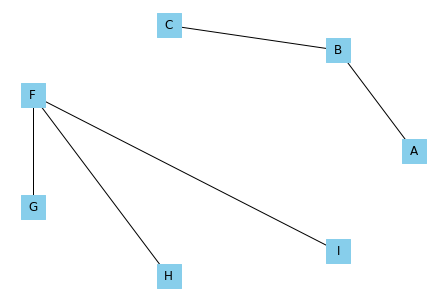

In [4]:
nx.draw_shell(g1, with_labels=True, node_color="skyblue", node_shape='s', node_size=600)
plt.show()

      Primjer 1.2: Nepovezani graf

**Def:** *Kažemo da je graf **potpuno povezan** ako su svaka dva vrha u grafu povezana točno jednim bridom.*

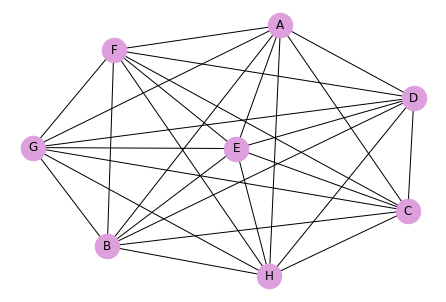

In [5]:
g2=nx.Graph()
nodes2=np.array(['A','B','C','D','E','F','G','H'])
n=nodes2.size
for i in range(0,n,1):
    g2.add_node(nodes2[i])
    
g2=nx.complete_graph(g2.nodes())

nx.draw(g2, with_labels=True, node_size=600, node_shape='o', node_color="plum")

        Primjer 1.3: Potpuno povezani graf

**Def:** <i>**Usmjereni graf** ili **digraf** je graf koji ima usmjerene bridove odnosno svakom bridu je pridružen njegov **početni** i **završni** vrh.</i>


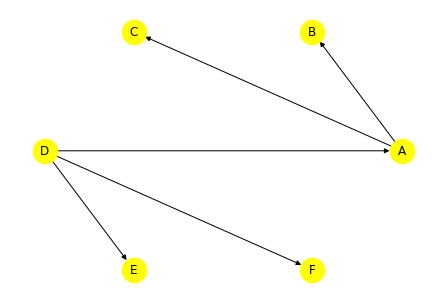

In [6]:
g3=nx.DiGraph()
g3.add_edge('A','B')
g3.add_edge('A','C')
g3.add_edge('D','A')
g3.add_edge('D','E')
g3.add_edge('D','F')
nx.draw_shell(g3, with_labels=True, node_size=600, node_shape='o', node_color="yellow")

    Primjer 1.4: Usmjereni graf

## <font color='steelblue' size=5px>2. Pretraživanje prostora stanja <a name="pps"></a></font>

Mnogo analitičkih problema se danas može riješiti pretraživanjem prostora stanja npr. igre poput sudoku, labirinta, Rubikova kocka,... Imamo neko početno stanje i moramo naći način za doći do završnog stanja. Postavlja se pitanje kakve to veze ima s grafovima?

**Pretraživanje prostora stanja** svodi se na problem pretraživanja usmjerenog grafa. **Vrhovi** grafa predstavljaju **stanja**, dok  **bridovi** predstavljaju **prijelaze među stanjima**.
**Čvor** je struktura koja pohranjuje stanje i još neke podatke (npr.dubinu čvora).
<br><br>
Pretražujući usmjereni graf, postepeno gradimo **stablo pretraživanja**.
Stablo pretraživanja gradimo tako da proširujemo čvorove i na  temelju funkcije sljedbenika, koja nam opisuje prijelaze među stanjima, generiramo njihove sljedbenike.

Redoslijed kojim proširujemo čvorove određuje **strategiju pretraživanja**.



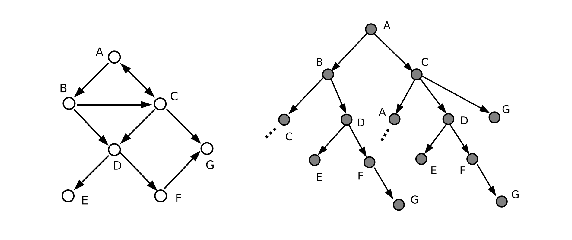

In [7]:
stablo = plt.imread('stablo.png')
fig0, ax0 = plt.subplots(figsize=(10,8))
ax0.imshow(stablo[200:950,50:1900])
ax0.set_axis_off()
#fig0

       Slika 1. Prostor stanja  -->  Stablo pretraživanja

**Vrste pretraživanja:**
* **Slijepo pretraživanje:**
    * Pretraživanje u širinu (Breadth-First Search)
    * Pretraživanje u dubinu (Depth-First Search,)
    * Pretraživanje s jednolikom cijenom (Uniform-Cost Search)
    * Ograničeno pretraživanje u dubinu
    * Dvosmjerno pretraživanje
* **Usmjereno pretraživanje:**
    * A*
    * Pretraživanje "najbolji prvi" (Greedy Best-First Search)
    * Pretraživanje usponom na vrh ( Hill-climbing search)

U nastavku ćemo se baviti samo proučavanjem BFS i DFS algoritama.

### <font color='steelblue' size=5px> 2.1. BFS - Pretraživanje u širinu <a name="bfs"></a> </font>

**Pretraživanje u širinu ili BFS (Breadth-First Search)** je algoritam slijepog pretraživanja koji funkcionira tako da se najprije ispituju svi čvorovi razine d u stablu pretraživanja, a nakon toga se ispituju njihova djeca, odnosno čvorovi razine d+1. Na taj način pretražujemo razinu po razinu grafa.

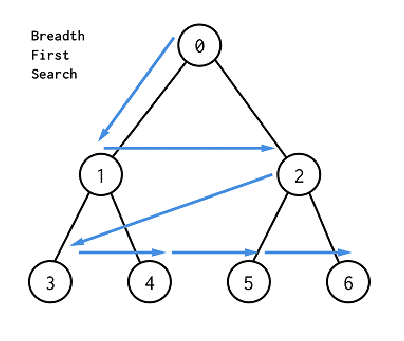

In [8]:
alg = plt.imread('BFSandDFS.png')
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.imshow(alg[0:310,0:370])
ax1.set_axis_off()

    Slika 2. BFS - redoslijed pretraživanja čvorova

Koristimo ga kada želimo pronaći put koji dolazi do rješenja u najmanje koraka i kada nismo sigurni je li dubina grafa konačna (ako koristimo BFS, sigurni smo da nam algoritam neće "zaglaviti" u nekoj beskonačnoj grani).

**Implementacija**

**Pomoćne funkcije:**
* Funkcija `isDefined` provjerava je li u rječniku-Dict definirana vrijednost za ključ-Key; fju koristimo u BFS algoritmu za provjeru kod unosa u rječnik `prev` jer želimo u njega spremiti samo jednog prethodnika svakog čvora koji je posjećen (i to onog prvog) - što znači ako je vrijednost već definirana, ne upisujemo ponovno niti ju mijenjamo. <br> <br>

* Funkcija `find_path` rekonstruira put na način da kreće od završnog čvora i za svaki čvor gleda koji mu je prethodnik. Ako algoritam nije uspio doći do završnog čvora onda se on ne pojavljuje u rječniku `prev` pa javljamo korisniku da rješenje ne postoji.

In [9]:
def isDefined(Dict, Key):
    for k in Dict:
        if k==Key:
            return True
    return False

def find_path(Dict, last):
    
    if(isDefined(Dict, last)):
        prev = Dict[last]
        path=list()
        path.append(last)

        while(prev!=0):
            path.append(prev)
            prev=Dict[prev]

        path.reverse()
        return path
    else:
        return

Za implementaciju BFS algoritma koristimo `red (queue)`.
* ubacimo početni čvor u red
* sve dok red nije prazan i sve dok nismo došli do završnog čvora:
    * uzmemo prvi čvor iz reda (onaj na vrhu)
    * ako čvor nije već ranije posjećen:
        * označimo da je posjećen
        * na kraj reda dodajemo sve njegove susjede

In [10]:
def BFS(graph,first,last):
    
    visited_bfs = list()
    path=list()
    
    if not graph:
        print("Prazan graf.")
        return path, visited_bfs
    
    if first not in graph:
        print("Pogrešno odabran početni čvor.")
        return path, visited_bfs

    
    queue=deque()
    queue.append(first)
    
    prev = dict()
    prev[first]=0

    while queue:
        node = queue.popleft()
        if not node in visited_bfs:
            visited_bfs.append(node)
            if(node==last):
                break
            
            for neighbor in graph[node]:
                queue.append(neighbor)
                if not isDefined(prev, neighbor):
                    prev[neighbor] = node
                
            
    path=find_path(prev, last)
    if not(path):
        print("Rješenje ne postoji.")
        
    return path,visited_bfs
    

In [11]:
graph1 = {'A': ['B','C','D','E', 'G'],
          'B': ['A'],
          'C': ['D','A'],
          'D': ['C', 'E', 'A'],
          'E': ['F','D'],
          'F': ['C'],
          'G': [], 
          'H': []}#služi samo tome da pokažemo što ako nema puta do nekog čvora

graph2=copy.deepcopy(graph1)

Želimo čvorove pretraživati abecednim redom pa zato liste susjeda za svaki čvor moramo sortirati. 

In [12]:
for node in graph1:
    graph1[node].sort()

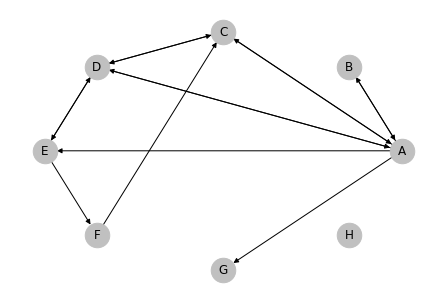

In [13]:
G = nx.DiGraph()
G.add_nodes_from(graph1.keys())
for key, value in graph1.items():
    G.add_edges_from([(key, t) for t in value])
nx.draw_circular(G, with_labels=True, node_size=600, node_style='o', node_color='silver')
plt.show()

     Graf G

**Primjer 2.1.1:** Želimo pomoću BFS algoritma naći put od čvora A do čvora E.

In [14]:
put_b1, posjeceni_b1 = BFS(graph1, 'A','E')
if put_b1:
    print(f'Put od čvora A do čvora E je : {put_b1}')
    print(f'Popis čvorova koji su posjećeni tijekom traženja puta: {posjeceni_b1}')

Put od čvora A do čvora E je : ['A', 'E']
Popis čvorova koji su posjećeni tijekom traženja puta: ['A', 'B', 'C', 'D', 'E']


Dodajemo čvorovima boje kako bi ih mogli drugačije obojati na grafu.

In [15]:
colormap = dict()
for node in graph1:
    if (put_b1):
        if node in put_b1:
            colormap[node] = 'greenyellow'
        else:
            colormap[node] = 'silver'
    else:
        colormap[node] = 'silver'

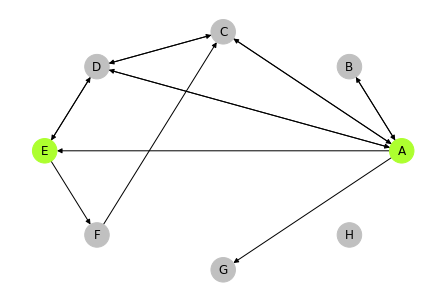

In [16]:
clrs = [colormap.get(node) for node in G.nodes()]
nx.draw_circular(G, with_labels=True, node_color=clrs, node_style = 'O', node_size=600)

    Primjer 2.1.1. Put od A do E pronađen BFS algoritmom u grafu G.

In [17]:
colormap_bv = dict()
for node in graph1:
    if (posjeceni_b1):
        if node in posjeceni_b1:
            colormap_bv[node] = 'red'
            #if node in put_b1:
            #    colormap_bv[node] = 'greenyellow'
        else:
            colormap_bv[node] = 'silver'
    else:
        colormap_bv[node] = 'silver'

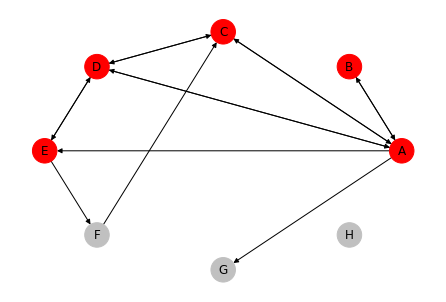

In [18]:
clrs_bv = [colormap_bv.get(node) for node in G.nodes()]
nx.draw_circular(G, with_labels=True, node_color=clrs_bv, node_style = 'o', node_size=600)

    Primjer 2.1.1. Graf posjećenih čvorova (BFS alg)

BFS algoritam kreće od čvora A i posjećuje sve njegove susjede. Nakon toga posjećuje njihove susjede itd.
Krećemo od A, njegovi susjedi su B,C,E pa njih prvo posjećujemo. Budući da smo tražili put do čvora E, a on je susjed čvora A, došli smo do rješenja.

**Primjer 2.1.2:** Želimo pronaći put od A do H. 

In [19]:
put_b2, posjeceni_b2 = BFS(graph1, 'A','H')

Rješenje ne postoji.


### <font color='steelblue' size=5px>2.2. DFS - Pretraživanje u dubinu<a name="dfs"></a></font>

**Pretraživanje u dubinu ili DFS (Depth-First Search)** je algoritam slijepog pretraživanja koji funkcionira tako da pretražuje granu po granu zadanog grafa.

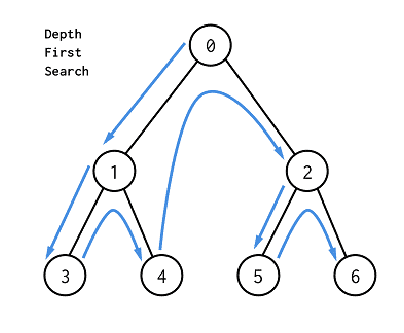

In [20]:
fig2, ax2 = plt.subplots(figsize=(7,7))
ax2.imshow(alg[0:310, 370:750])
ax2.set_axis_off()

    Slika 3. DFS - redoslijed pretraživanja čvorova

Koristan je za nalaženje rješenja labirinta kada je rješenje negdje duboko u grani i koristan je kada je graf jako razgranan. Zbog njegovog načina pretraživanja, **ne koristimo ga** u slučaju da je koja grana beskonačna jer će algoritam tada "zapeti" u toj grani i nikad neće pretražiti ostale grane.

**Implementacija:**
Za implementaciju DFS algoritma koristimo `stack` u koji čvorove pohranjujemo obrnutim abecednim poretkom kako bi ih kod pretraživanja mogli pretraživati abecedno (zbog LIFO - Last in - First out strukture)

Implementacija je vrlo slična implementaciji BFS algoritma, jedina razlika je korištenje druge strukture podataka (uzimamo zadnji ubačeni na stog, a ne prvi kao kod reda) i poredak nekih provjera.

In [21]:
def DFS (graph, first, last): #graph je u dict obliku
    
    visited_dfs = list()
    path = list()
    
    if not graph:
        print ("Graf je prazan.")
        return path, visited_dfs
    
    if first not in graph:
        print("Pogrešno odabran početni čvor.")
        return path, visited_dfs
    
    stack = deque()
    stack.append(first)
   
    prev=dict()
    prev[first]=0
    
    while stack:
        node = stack.pop()

        visited_dfs.append(node)
        if(node == last):
            break

        for neighbor in graph[node]:
            if not (neighbor in visited_dfs):
                stack.append(neighbor)
                prev[neighbor]=node
                
    path = find_path(prev, last)
    if not(path):
        print("Rješenje ne postoji.")
        
    return path, visited_dfs

Dodajemo u stack obrnutim abecednim redom kako bi ih mogli pretraživati abecedno pa moramo prije sortirati.

In [22]:
for node in graph2:
    graph2[node].sort(reverse=True)

<br>

**Primjer 2.2.1.**: Na prije definiranom grafu G želimo naći put od A do E pomoću DFS algoritma. 

In [23]:
put_d, posjeceni_d = DFS(graph2, 'A', 'E')
if put_d:
    print(f'Put od čvora A do čvora E je : {put_d}')
    print(f'Popis čvorova koji su posjećeni tijekom traženja puta: {posjeceni_d}')

Put od čvora A do čvora E je : ['A', 'C', 'D', 'E']
Popis čvorova koji su posjećeni tijekom traženja puta: ['A', 'B', 'C', 'D', 'E']


<br> Pogledajmo grafove.

In [24]:
colormap_d = dict()
for node in graph2:
    if (put_d):
        if node in put_d:
            colormap_d[node] = 'greenyellow'
        else:
            colormap_d[node] = 'silver'
    else:
        colormap_d[node] = 'silver'

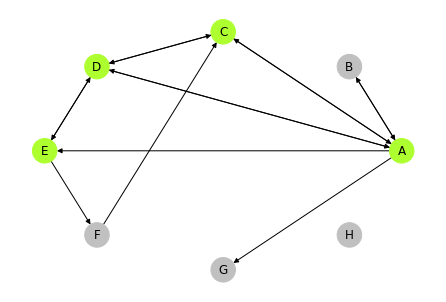

In [25]:
clrs_d = [colormap_d.get(node) for node in G.nodes()]
nx.draw_circular(G, with_labels=True, node_color=clrs_d, node_style = 'O', node_size=600)

    Primjer 2.2.1.: Put od A do E dobiven DFS algoritmom

In [26]:
colormap_dv = dict()
for node in graph1:
    if (posjeceni_d):
        if node in posjeceni_d:
            colormap_dv[node] = 'red'
        else:
            colormap_dv[node] = 'silver'
    else:
        colormap_dv[node] = 'silver'

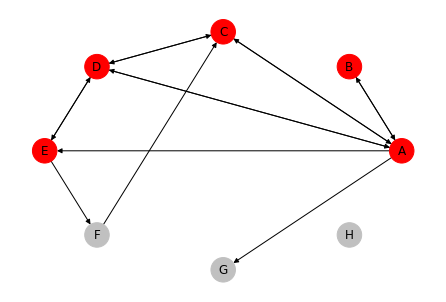

In [27]:
clrs_dv = [colormap_dv.get(node) for node in G.nodes()]
nx.draw_circular(G, with_labels=True, node_color=clrs_dv, node_style = 'o', node_size=600)

    Primjer 2.2.1.: Graf posjećenih čvorova (DFS alg)

DFS algoritam pretražuje u dubinu. Krećemo od čvora A i gledamo njegovog prvog susjeda - čvor B. Idući na redu kojeg bi posjetili je prvi susjed čvora B, no B nema susjeda pa prelazimo na idućeg susjeda čvora A, a to je čvor C. Sad gledamo prvog susjeda čvora C - čvor D. Jedini susjed čvora D je čvor E pa smo tako došli do rješenja.

**BFS i DFS ne daju nužno isto rješenje** (što smo mogli vidjeti i u prethodnom primjeru).

## <font color='steelblue' size=5px>3. Primjena BFS i DFS <a name="labirint"></a> </font>

Pogledat ćemo primjenu BFS i DFS algoritma na labirintima različitih veličina i oblika (odnosi se na položaj zapreka). Radi jednostavnosti, promatrat ćemo samo kvadratne (*nxn*) labirinte. Na taj način ćemo vidjeti prije navedene karakteristike algoritama na stvarnim primjerima. Na kraju ćemo usporediti rezultate algoritama na svakom labirintu u smislu broja čvorova koje posjeti. Opis postupka dan je kroz opise funkcija koje koristimo.

**Funkcija `read_from_txt`** čita labirint iz txt file-a. Labirint je zapisan tako da '#' predstavljaju zidove i zapreke, a '.' prazna polja.
Prvo prebrojimo koliko ima linija labirint u txt file-u, zatim razdvojimo labirint po linijama i zatim još svaku liniju razdvojimo na znakove. Sve to spremamo u listu lista. Nakon funkcije convert_to_graph() koja se nalazi u nastavku, napisan je primjer labirinta na kojem se može vidjeti kako bi on točno izgledao nakon što ga funkcija read_from_text pročita.
<br>
Argument funkcije je naziv txt file-a koji želimo pročitati. Primjer "ime.txt" (s navodnicima!)

In [28]:
def read_from_txt(level): 
    
    try:
        file = open(level,"r")
        
        counter = 0
    
        #brojimo koliko ima linija
        content = file.read() 
        List = content.split("\n") 

        for i in List: 
            if i: 
                counter += 1

        file.close()
        try: 
            file=open(level, "r")
        except FileNotFoundError:
            print("Uneseni txt ne postoji")
    
        #čitamo liniju po liniju
        line=[]
        while 1:  
            char = file.readline(counter)           
            if not char:  
                break
            line.append(char)
    
        #maknemo prazne linije
        line1=[]
        for i in range(0, len(line),1):
            if(line[i]!='\n'):
                line1.append(line[i])
    
        #spremamo u listu znakove (imamo listu lista, svaka lista je jedan redak)
        maze=[]
        for i in range(0,len(line1), 1):
            tmp=[]
            for j in range(0, counter,1):
                tmp.append(line1[i][j])
        
            maze.append(tmp)
 
        return maze

    except FileNotFoundError:
        print("Uneseni txt ne postoji.")

**Funkcija `convert_to_graph`:** <br>
Želimo zadani labirint pretvoriti u graf.<br>
Funkcija prima listu čiji su elementi liste. Svaka lista liste mora imati broj elemenata jednak broju lista liste.<br>Prazna polja u labirintu smatrat ćemo vrhovima grafa kojeg stvaramo i kasnije pretražujemo. Polja koja su zauzeta (prepreke) ne ubacujemo u graf. <br>
Broj čvora smo odredili pomoću varijable pos koju povećavamo u svakom koraku kad se pomaknemo za jedno polje dalje u listi. Ako želimo iz *pos*  dobiti *i* i *j* onda vrijedi sljedeća jednakost.
<br>` (i , j) = ( pos%n, floor(pos/n))` 

In [29]:
def convert_to_graph(maze):
    
    graph = dict()
    neighbor=[] #lista susjeda
    n=len(maze)
    pos=-1
    counter_s=0
    counter_e=0
    
    for i in range(0,n,1):
        if(len(maze[i]) != n):
            print("Krivi unos!")
            return graph
        
    for i in range(0,n,1):
        for j in range(0,n,1):
            if(maze[i][j]!='#' and maze[i][j]!='.' and maze[i][j]!='S' and maze[i][j]!='E'):
                print("Krivi unos!")
                return graph 
    
    for i in range (0,n,1):
        for j in range(0,n,1):
            neighbor=[]
            pos+=1
            if(maze[i][j]!='#'):
                if(i+1<n and maze[i+1][j]!='#'):
                    down = pos+n
                    neighbor.append(down) #dozvoljen je pomak desno
                if(i-1>=0 and maze[i-1][j]!='#'):
                    up = pos-n
                    neighbor.append(up)
                if(j+1<n and maze[i][j+1]!='#'):
                    right = pos+1
                    neighbor.append(right)
                if(j-1>=0 and maze[i][j-1]!='#'):
                    left = pos-1
                    neighbor.append(left)
                graph[pos]=neighbor
    
    return graph
    
## BFS treba sort, a DFS sort(reverse=True)

**Primjer:**
Pretpostavimo da imamo labirint 3x3 koji izgleda ovako:

<table>
    <tr><td>#</td><td>.</td><td>.</td></tr>
    <tr><td>#</td><td>.</td><td>#</td></tr>
    <tr><td>.</td><td>.</td><td>#</td></tr>
</table> <br>

Zapreke (#) su na poljima (0,0), (1,0), (1,2) i (2,2). Sva ostala polja tog labirinta su slobodna i želimo ih dodati u graf koji ćemo pretraživati. Prema gore opisanom načinu za određivanje broja čvora dobijemo sljedeću tablicu: 

<table>
    <tr><td>0</td><td>1</td><td>2</td></tr>
    <tr><td>3</td><td>4</td><td>5</td></tr>
    <tr><td>6</td><td>7</td><td>8</td></tr>
</table>

Iz ovog prikaza vidimo da ćemo u grafu imati čvorove označene sa *`1,2,4,6,7`* . <br>
Graf spremamo u dictionary oblika `čvor: [susjedi]` <br>

Funkciju koristimo kada želimo dobiti graf u obliku rječnika tj. kada na grafu želimo pozvati funckije BFS i DFS.

In [30]:
labirint = []
labirint.append(['#','.','.'])
labirint.append(['#','.','#'])
labirint.append(['.','.','#'])

graph = convert_to_graph(labirint)
if(graph):
    for node in graph:
        print(f'{node}: {graph[node]}')

1: [4, 2]
2: [1]
4: [7, 1]
6: [7]
7: [4, 6]


1: [4,2] --> čvor 1 ima susjede 4 i 2

Na ovako spremljenom labirintu sada možemo pozivati funkcije BFS i DFS. Potrebno je samo sortirati liste susjeda u rječniku.

 <br>
 
 Iduća funkcija koju ćemo koristiti je funkcija **`draw`** koja crta labirint. Parametri koje ona prima su:
 * **maze** = labirint koji je pročitan iz txt-a (lista lista) - bez pozivanja convert_to_graph
 * **path** = put koji želimo da prikaže - lista čvorova koji se nalaze u gornjem labirintu
 * **visited** = lista posjećenih čvorova <br> <br>
 Labirint je prikazan na sljedeći način:
 * <font color='black'> **crna polja** </font> -> zapreke
 * <font color='silver'> **bijela polja** </font> -> prazna polja
 * <font color='firebrick'> **crvena polja** </font> -> sva posjećena polja
 * <font color='mediumseagreen'> **zelena polja** </font> -> put do cilja
 * <font color='gold'> **žuta polja** </font> -> početna (S) i završna (E) točka


In [31]:
def draw(maze,path,visited):

    if not maze:
        print("Greška kod učitavanja labirinta.")
        return
    
    size=len(maze)
    
    for i in range(0,size,1):
        if(len(maze[i])!=size):
            print("Greška u dimenzijama labirinta.")
            return 
        
    for i in range(0,size,1):
        for j in range(0,size,1):
            if(maze[i][j]!='#' and maze[i][j]!='.' and maze[i][j]!='S' and maze[i][j]!='E'):
                print("Greška u labirintu!")
                return
    
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_facecolor('white')
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)

    rects_o=[]
    rects_e=[]
    rects_p=[]
    rects_v=[]
    rects_s=[]

    colors=np.arange(10000)
    for i in range(0,10000,1):
        colors[i]=0
        
    k=0
    for i in range (0,size,1):
        for j in range(0,size,1):
            if(maze[i][j]=='#'):
                rectangle = Rectangle([j,size-i-1], 1, 1, antialiased = True)
                rects_o.append(rectangle)
                
            elif(maze[i][j]=='S' or maze[i][j]=='E'):
                rectangle = Rectangle([j,size-i-1], 1, 1, antialiased = True)
                rects_s.append(rectangle)
                
            elif(k in path):
                rectangle = Rectangle([j,size-i-1], 1, 1, antialiased = True)
                rects_p.append(rectangle) 

            elif((k in visited) and (k not in path)):
                rectangle = Rectangle([j,size-i-1], 1, 1, antialiased = True)
                rects_v.append(rectangle)

            elif(maze[i][j]!='#'): 
                rectangle = Rectangle([j,size-i-1], 1, 1, antialiased = True)
                rects_e.append(rectangle)
            k+=1               

    rect_pcs_o = PatchCollection(rects_o, edgecolor='black', cmap='gray')   #obstacles
    rect_pcs_e = PatchCollection(rects_e, edgecolor='white', cmap='Greys')  #empty fields
    rect_pcs_p = PatchCollection(rects_p, edgecolor='gray', cmap='Accent')  #path
    rect_pcs_v = PatchCollection(rects_v, edgecolor='gray', cmap='RdYlBu')  #visited
    rect_pcs_s = PatchCollection(rects_s, edgecolor='gray', cmap='Wistia')  #start and end

    rect_pcs_o.set_array(colors)
    rect_pcs_e.set_array(colors)
    rect_pcs_p.set_array(colors)
    rect_pcs_v.set_array(colors)
    rect_pcs_s.set_array(colors)

    ax.add_collection(rect_pcs_o)
    ax.add_collection(rect_pcs_e)
    ax.add_collection(rect_pcs_p)
    ax.add_collection(rect_pcs_v)
    ax.add_collection(rect_pcs_s)

    ax.plot()

**Pogledajmo sada kako primjena BFS i DFS izgleda na labirintima:** <br>
Uzet ćemo labirinte dimenzija 41x41, 51x51, 61x61 i naći njihova rješenja pomoću BFS i DFS algoritama. Labirinti su generirani na slučajan način na stranici: https://www.dcode.fr/maze-generator <br>
Početna i završna točka u svim labirintima su prvo i zadnje polje ploče tj.:
* `početna: 0`
* `završna: veličina_labirinta**2 - 1`
<br> <br>
U svakom od primjera prvo ćemo nacrtati prazni labirint, zatim rješenje pomoću BFS-a i nakraju rješenje pomoću DFS-a.

**Labirint 41x41**

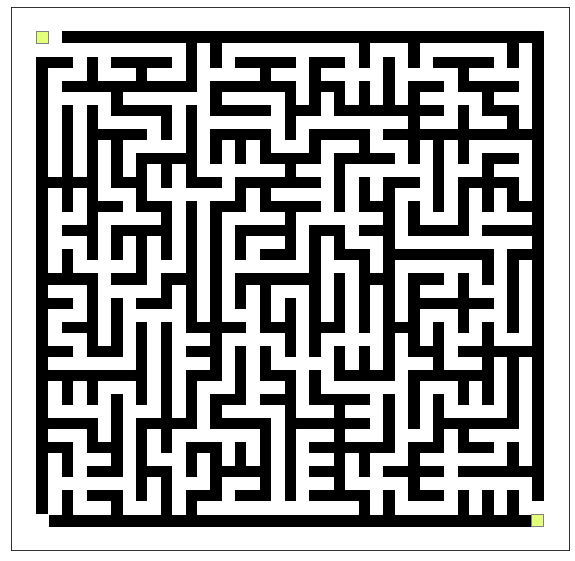

In [32]:
lab41=read_from_txt("lab_41.txt")
last41 = 41**2-1
draw(lab41,[],[])

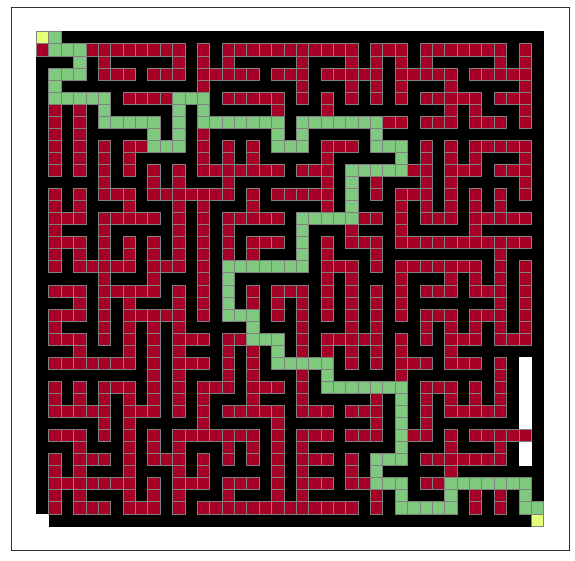

In [33]:
graph41_b = convert_to_graph(lab41)
if(graph41_b):
    for node in graph41_b:
        graph41_b[node].sort()
    pathb=[]
    visitedb=[]
    pathb, visitedb = BFS(graph41_b, 0,last41)
    if(pathb):
        draw(lab41,pathb,visitedb)

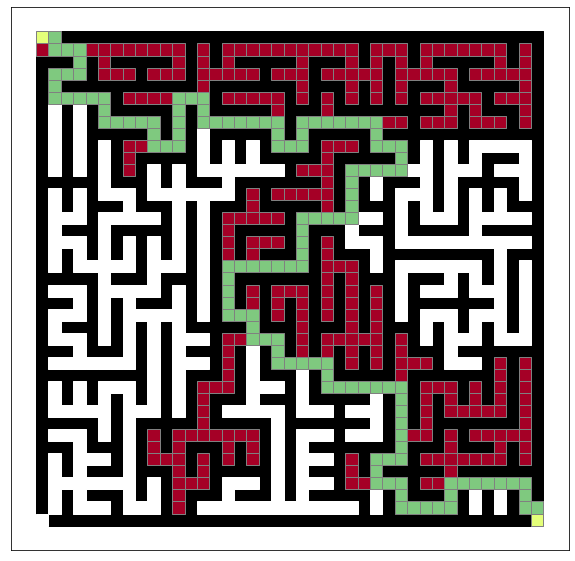

In [34]:
graph41_d=convert_to_graph(lab41)
if(graph41_d):
    for node in graph41_d:
        graph41_d[node].sort(reverse=True)
    pahtd=[]
    visitedd=[]
    pathd, visitedd = DFS (graph41_d,0,last41)
    if pathd:
        draw(lab41,pathd,visitedd)

In [35]:
number_of_visited = pd.DataFrame(columns=['Dimenzija', 'BFS', 'DFS'])
number_of_visited = number_of_visited.append(pd.Series(['41', len(visitedb), len(visitedd)], index=['Dimenzija','BFS','DFS']), ignore_index=True)

**Labirint 51x51:**

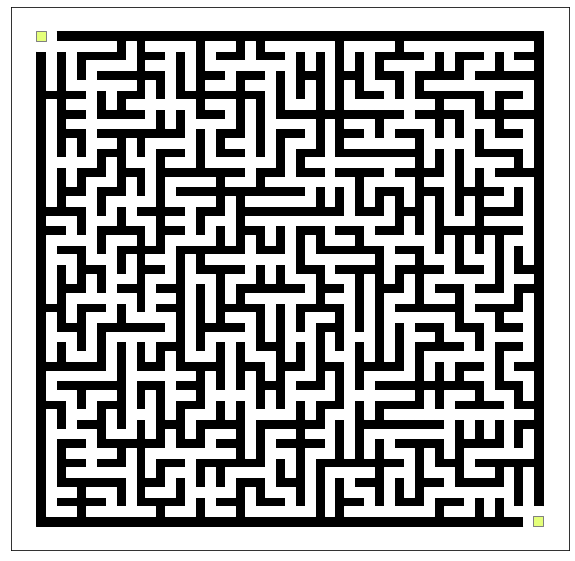

In [36]:
lab51=read_from_txt("lab_51.txt")
last51 = 51**2-1
draw(lab51,[],[])

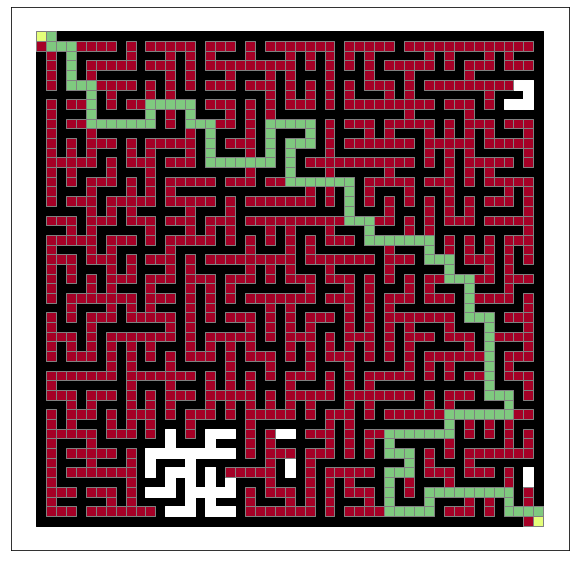

In [37]:
graph51_b = convert_to_graph(lab51)
if(graph51_b):
    for node in graph51_b:
        graph51_b[node].sort()
    pathb=[]
    visitedb=[]
    pathb, visitedb = BFS(graph51_b, 0,last51)
    if(pathb):
        draw(lab51,pathb,visitedb)

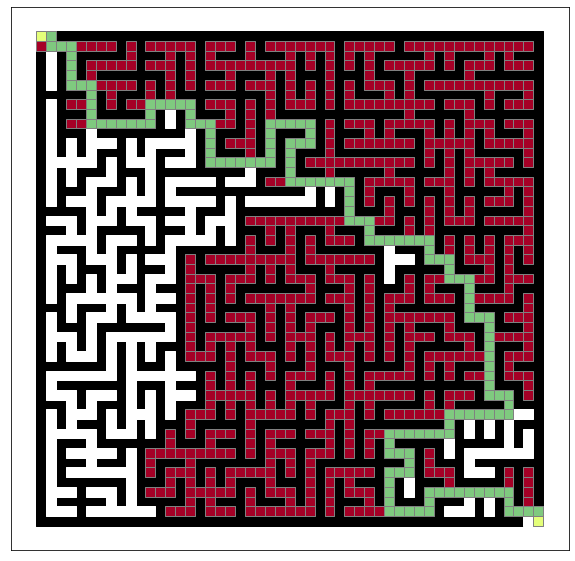

In [38]:
graph51_d=convert_to_graph(lab51)
if(graph51_d):
    for node in graph51_d:
        graph51_d[node].sort(reverse=True)
    pahtd=[]
    visitedd=[]
    pathd, visitedd = DFS (graph51_d,0,last51)
    if pathd:
        draw(lab51,pathd,visitedd)

In [39]:
number_of_visited = number_of_visited.append(pd.Series(['51', len(visitedb), len(visitedd)], index=['Dimenzija','BFS','DFS']), ignore_index=True)

**Labirint 61x61:**

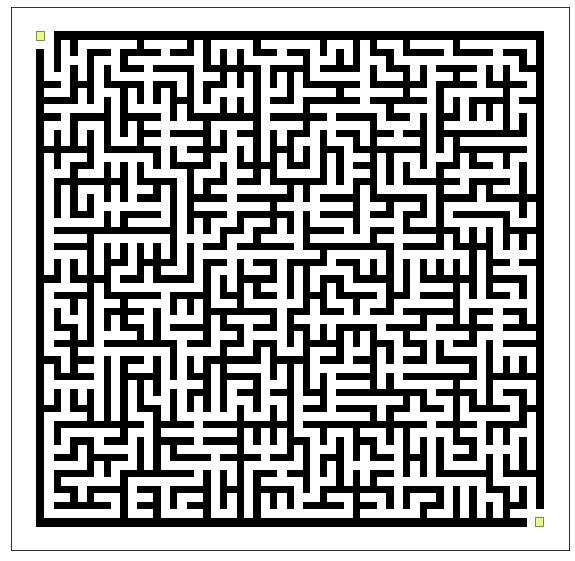

In [40]:
lab61=read_from_txt("lab_61.txt")
last61 = 61**2-1
draw(lab61,[],[])

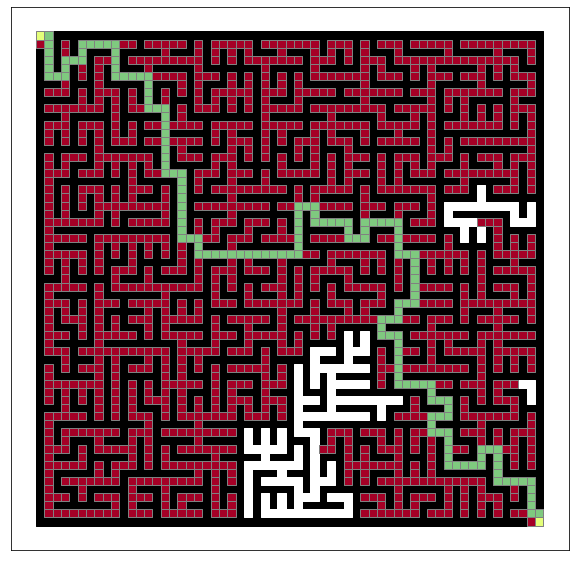

In [41]:
graph61_b = convert_to_graph(lab61)
if(graph61_b):
    for node in graph61_b:
        graph61_b[node].sort()
    pathb=[]
    visitedb=[]
    pathb, visitedb = BFS(graph61_b, 0,last61)
    if(pathb):
        draw(lab61,pathb,visitedb)

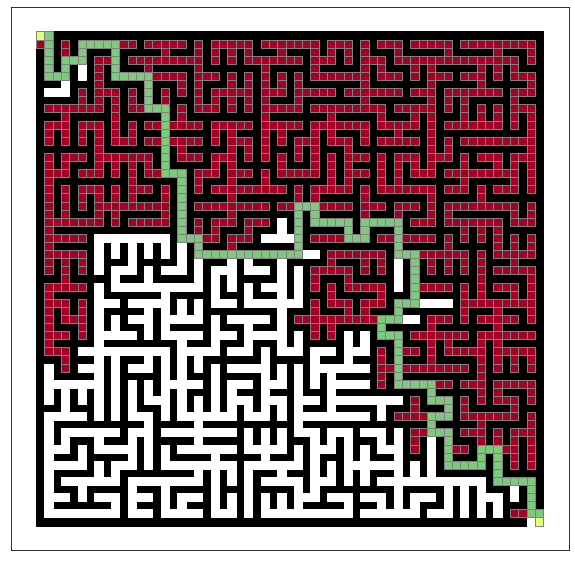

In [42]:
graph61_d=convert_to_graph(lab61)
if(graph61_d):
    for node in graph61_d:
        graph61_d[node].sort(reverse=True)
    pahtd=[]
    visitedd=[]
    pathd, visitedd = DFS (graph61_d,0,last61)
    if pathd:
        draw(lab61,pathd,visitedd)

In [43]:
number_of_visited = number_of_visited.append(pd.Series(['61', len(visitedb), len(visitedd)], index=['Dimenzija','BFS','DFS']), ignore_index=True)

Vidimo već iz prikaza labirinta da je DFS algoritam došao rješenja u manje koraka odnosno da je posjetio manje čvorova. Pogledajmo kako sve to izgleda u brojkama:


In [44]:
number_of_visited["Razlika"]=number_of_visited['BFS']-number_of_visited['DFS']

In [45]:
number_of_visited

,Dimenzija,BFS,DFS,Razlika
0,41,796,412,384
1,51,1201,898,303
2,61,1646,1120,526


## <font color='steelblue' size=5px>4. Zaključak: <a name="zakljucak"></a> </font>

Kroz primjere smo mogli vidjeti da oba algoritma dolaze do rješenja, ali je razlika u broju posjećenih čvorova i u duljini puta do završnog čvora. BFS nam daje najkraće rješenje, no na primjeru labirinta mogli smo uočiti da DFS u manje koraka dolazi do rješenja (odnosno manje čvorova posjeti na putu do rješenja). Ne možemo iz toga zaključiti da je neki od algoritama bolji ili gori jer kao što smo i ranije već spomenuli, to ovisi o primjeru na kojem pozivamo algoritme. DFS pretražuje granu po granu i zbog toga je on bolji u traženju puta u labirintu, no problem kod pretraživanja općenito je ako zaluta u neku beskonačnu granu jer tad se nikad neće vratiti na ostale grane. S druge strane, BFS pretraži puno više čvorova u labirintu jer pretražuje u širinu, razinu po razinu i ako je velika razgranatost grafa, to pretraživanje traje dulje. 
Zaključak koji možemo izvući iz svega je da je BFS bolji ako želimo naći najkraći put i ako graf nije jako razgranat ili ako imamo neku beskonačnu granu. S druge strane, DFS je bolji ako imamo konačnu dubinu grafa i ako je efikasnije pretraživati granu po granu nego ići u širinu (primjer labirinta), no on nam ne daje najkraće rješenje. 
<br> <br>
**Napomena na kraju:** BFS i DFS postoje implementirani u networkx, ali ideja ovog eseja je bila pobliže ih upoznati - vidjeti njihovu implementaciju i način pretraživanja te  pogledati kako oni funckioniraju na konkretnim primjeru, a ne samo na nekom malom grafu.

## <font color='steelblue' size=5px>5. Literatura: <a name="lit"></a> </font>
* http://degiorgi.math.hr/~singer/ui/ui_1415/UI-2-PretrazivanjeProstoraStanja.pdf 
* https://docs.python.org/3/library/collections.html#collections.deque
* https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.patches.Rectangle.html
* https://networkx.github.io/documentation/networkx-2.4/reference/index.html
* https://networkx.github.io/documentation/stable/reference/drawing.html
* https://web.math.pmf.unizg.hr/nastava/komb/predavanja/predavanja.pdf
* https://www.dcode.fr/maze-generator
* http://www.zemris.fer.hr/predmeti/mr/arhiva/2002-2003/seminari/finished/pdf/grafovi.pdf 

